# Validation and Verification of the kernel shots

Here we provide code and analysis of the kernel shots for all cups done using Google Computing Engine. Total of **12,398** shots were computed, processed and analyzed.

In [10]:
from __future__ import print_function

import sys
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [11]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 2.7.9 (default, Apr  2 2015, 15:33:21) 
[GCC 4.9.2]
Pandas version 0.15.0
Matplotlib version 1.4.2


First, data shall be prepared by reading all **12,398** shots. Smaller number of shots could be processed as well.
We advice to create list of shots to be processed and run script dmax_list.py. All listed shots will be processed and **dmax** values and (20,50,80) percent of dmax values would be found. For **dmax** values we average 8 voxels around the shot point, so dose max value is by default, in 2.4x2.4x2.4 mm^3 voxel. X, Y, Z curves to compute (20,50,80) percent values are averaged over 4 voxels. Values are checked for consistency, so that value on curve around the max averaged over two neighbours is exactly equal to dmax.

## We will be reading and looking at data first

In [12]:
dt = pd.read_csv("Shots", header=None, delim_whitespace=True, names=["Cup", "Num", "Col", "ShY", "ShZ", "Dm", "X20L", "X20R", "X50L", "X50R", "X80L", "X80R", "Y20L", "Y20R", "Y50L", "Y50R", "Y80L", "Y80R", "Z20L", "Z20R", "Z50L", "Z50R", "Z80L", "Z80R"])
dt = dt.sort(["Cup", "Num", "Col", "ShY", "ShZ"], ascending=[0, 1, 0, 1, 1])
dt.index = range(0, len(dt)) # make it reindex

Print first five rows of the data

In [13]:
dt.head() # first five rows

,Cup,Num,Col,ShY,ShZ,Dm,X20L,X20R,X50L,X50R,...,Y50L,Y50R,Y80L,Y80R,Z20L,Z20R,Z50L,Z50R,Z80L,Z80R
0,S,1,25,0,0,1.907266e-16,-22.355306,22.355306,-17.185649,17.185649,...,-17.293853,17.293853,-14.545359,14.545359,-21.611787,20.826188,-17.647240,17.852935,-14.466220,15.765073
1,S,1,25,0,5,1.991874e-16,-22.376457,22.376457,-17.177756,17.177756,...,-17.211615,17.211615,-14.492459,14.492459,-16.609447,25.833688,-12.657302,22.714655,-9.754164,20.645736
2,S,1,25,0,10,2.035176e-16,-22.384272,22.384272,-17.167296,17.167296,...,-17.272254,17.272254,-14.432926,14.432926,-11.482828,30.740801,-7.646440,27.760257,-4.626096,25.644792
3,S,1,25,0,15,2.083157e-16,-22.425377,22.425377,-17.120980,17.120980,...,-17.290000,17.290000,-14.582118,14.582118,-6.410482,35.751543,-2.728603,32.542563,0.419287,30.586320
4,S,1,25,0,20,2.129804e-16,-22.760618,22.760618,-17.309552,17.309552,...,-17.198637,17.198637,-14.579994,14.579994,-1.426784,40.773973,2.570646,37.710427,5.668148,35.675341


Now last five rows of the data

In [14]:
dt.tail() # last five rows

,Cup,Num,Col,ShY,ShZ,Dm,X20L,X20R,X50L,X50R,...,Y50L,Y50R,Y80L,Y80R,Z20L,Z20R,Z50L,Z50R,Z80L,Z80R
12393,L,9,15,75,0,1.818398e-16,-15.159589,15.159589,-11.501568,11.501568,...,63.965164,86.162718,65.985564,84.311324,-14.078267,13.907491,-11.487182,11.734141,-9.310760,10.042994
12394,L,9,15,75,5,1.894416e-16,-15.239336,15.239336,-11.512529,11.512529,...,63.965667,86.128686,65.981304,84.241938,-9.069463,18.319223,-6.405459,16.586799,-4.182178,14.870173
12395,L,9,15,75,10,1.937118e-16,-15.256118,15.256118,-11.499348,11.499348,...,63.955141,86.082433,66.086415,84.191954,-4.042055,22.290685,-1.312641,18.855919,0.834548,18.127326
12396,L,9,15,75,15,2.019940e-16,-14.133734,14.133734,-10.054211,10.054211,...,64.065095,86.160654,66.017867,84.321616,1.176803,24.591891,3.624403,20.046290,5.838366,18.453707
12397,L,9,15,75,20,1.013457e-16,-11.600757,11.600757,-10.603047,10.603047,...,61.366755,88.524613,63.153494,86.912929,4.185361,25.144125,6.482131,24.760312,7.837151,24.376499


In [15]:
dt.dtypes # types of the columns

Cup      object
Num       int64
Col       int64
ShY     float64
ShZ     float64
Dm      float64
X20L    float64
X20R    float64
X50L    float64
X50R    float64
X80L    float64
X80R    float64
Y20L    float64
Y20R    float64
Y50L    float64
Y50R    float64
Y80L    float64
Y80R    float64
Z20L    float64
Z20R    float64
Z50L    float64
Z50R    float64
Z80L    float64
Z80R    float64
dtype: object

In [16]:
dt.info() # some summary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12398 entries, 0 to 12397
Data columns (total 24 columns):
Cup     12398 non-null object
Num     12398 non-null int64
Col     12398 non-null int64
ShY     12398 non-null float64
ShZ     12398 non-null float64
Dm      12398 non-null float64
X20L    12398 non-null float64
X20R    12398 non-null float64
X50L    12398 non-null float64
X50R    12398 non-null float64
X80L    12398 non-null float64
X80R    12398 non-null float64
Y20L    12398 non-null float64
Y20R    12398 non-null float64
Y50L    12398 non-null float64
Y50R    12398 non-null float64
Y80L    12398 non-null float64
Y80R    12398 non-null float64
Z20L    12398 non-null float64
Z20R    12398 non-null float64
Z50L    12398 non-null float64
Z50R    12398 non-null float64
Z80L    12398 non-null float64
Z80R    12398 non-null float64
dtypes: float64(21), int64(2), object(1)
memory usage: 2.4 MB


So far looks right, we have  first three classification columns (with Cup name, Cup number and collimator), then two columns with shot Y,Z position and Dmax. Last 18 columns are six per axis, with two values (L marking Left and R marking Right) per one percentage value out of (20, 50, 80).

## Plotting dmax values per cup

We will plot all cups with dmax placed at particular shot location. Per page we make two plots, left one being actual cup with its size and number. Right plot will be for a largest cup of the series.

In [17]:
def find_idx_nearby_shot(df, sh_y, sh_z):
    """
    Given shot Y and shot Z,
    find row index for this shot and
    """
    
    cY = df["ShY"]
    cZ = df["ShZ"]

    for idx in df.index:
        if math.fabs( cY.loc[idx] - sh_y ) < 0.5 and math.fabs( cZ.loc[idx] - sh_z ) < 0.5:
            return idx
            
    return -1

def dmax_at_nearby_shot(df, sh_y, sh_z):
    """
    Given shot Y and shot Z,
    find row index for this shot and
    return dmax
    """
    
    idx = find_idx_nearby_shot(df, sh_y, sh_z)
    if idx < 0:
        return 0.0
    return df["Dm"].loc[idx]

def make_an_image(df):
    """
    Make an image out of data frame
    """

    ymin = df["ShY"].min()
    ymax = df["ShY"].max()
    zmin = df["ShZ"].min()
    zmax = df["ShZ"].max()
    #print(ymin, ymax, zmin, zmax)
    
    step = 5.0
    ny = int( np.around((ymax - ymin)/step) ) + 1
    nz = int( np.around((zmax - zmin)/step) ) + 1
    #print(ny, nz)

    sh_dm = np.empty((nz, ny))

    for iz in range(0, nz):
        z = zmin + float(iz) * step
        for iy in range(0, ny):
            y = ymin + float(iy) * step
            
            dm = dmax_at_nearby_shot(df, y, z)
            sh_dm[iz, iy] = dm
            
    return sh_dm


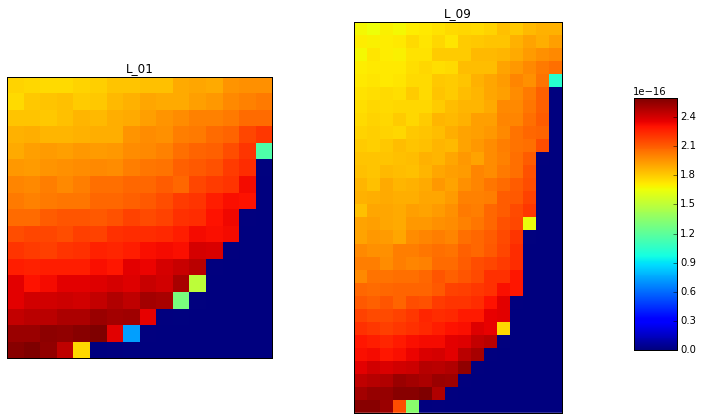

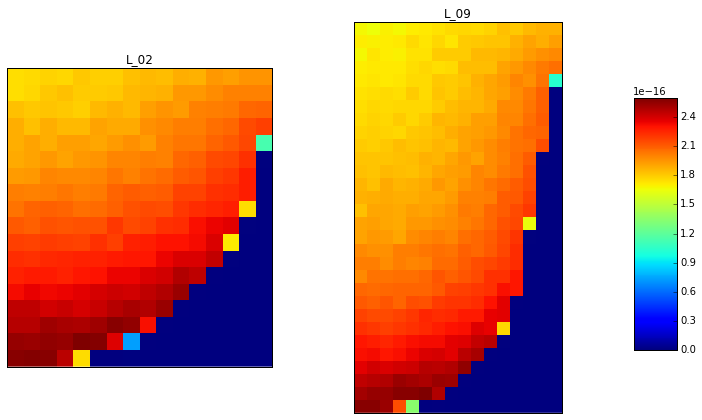

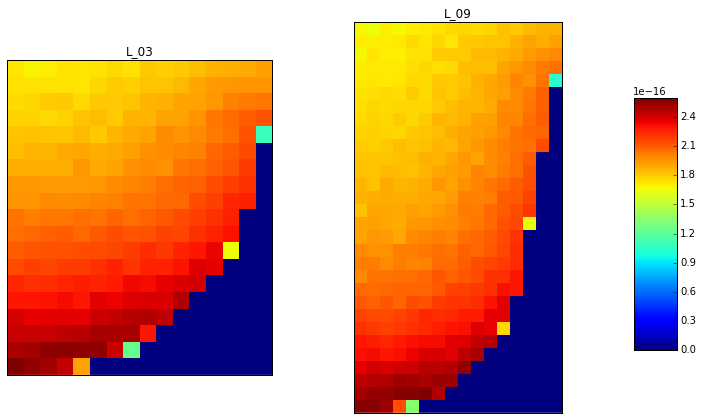

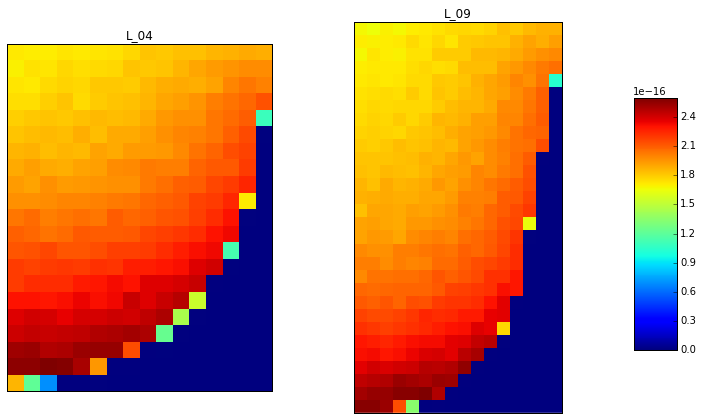

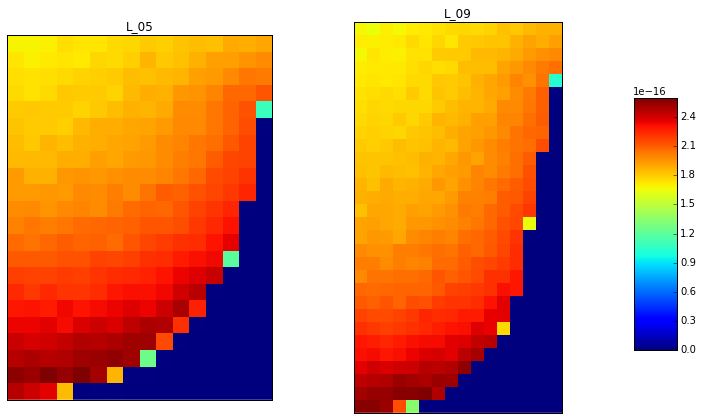

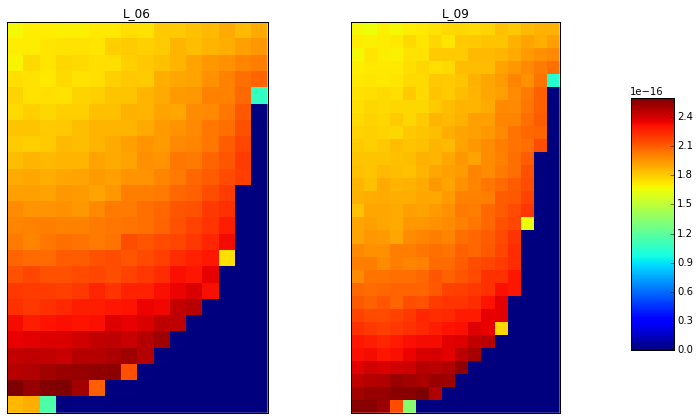

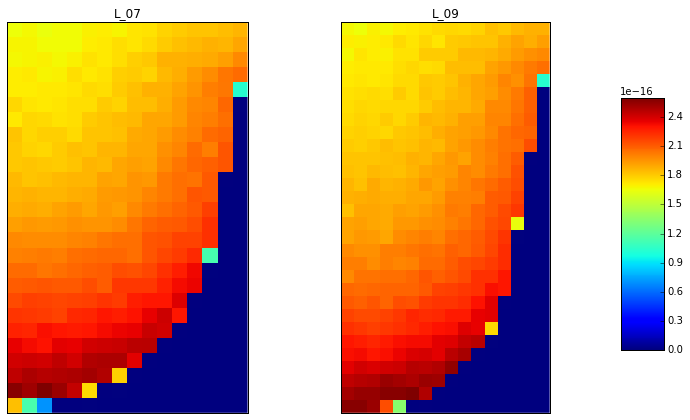

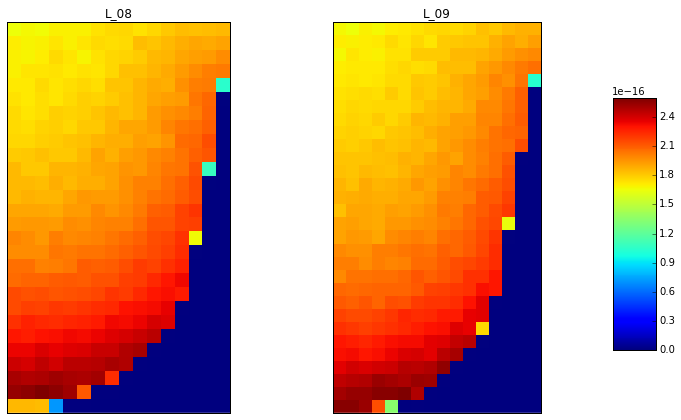

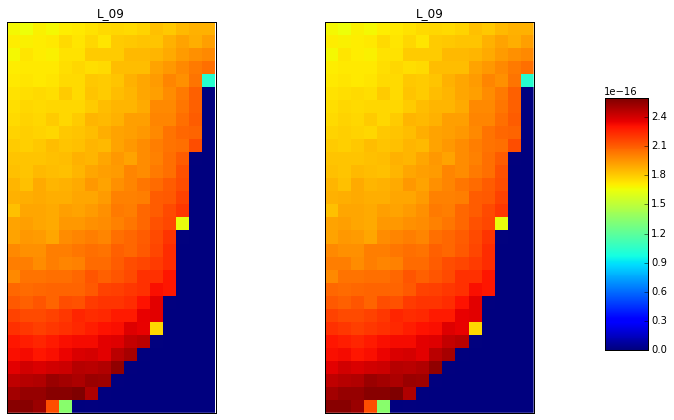

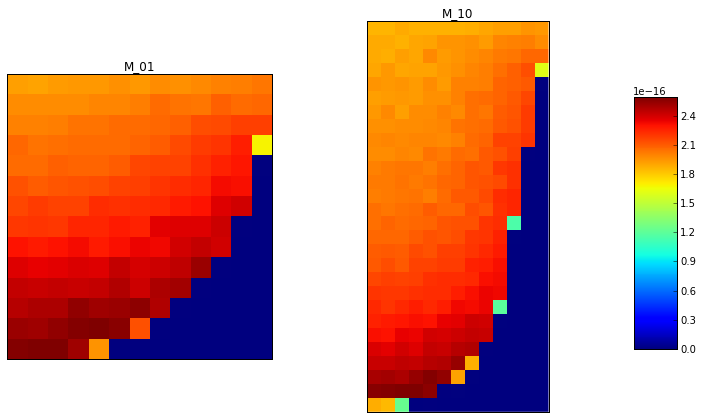

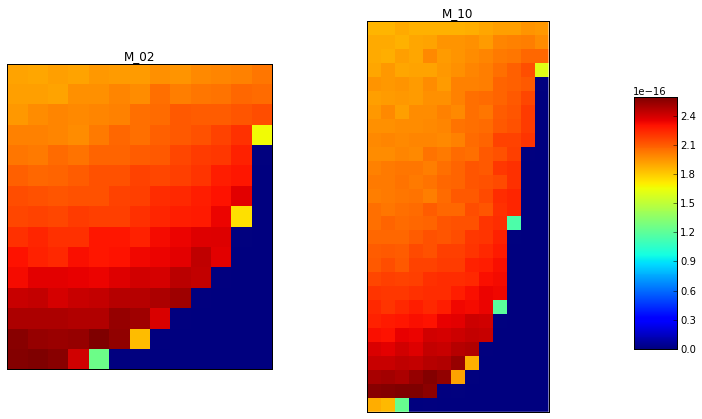

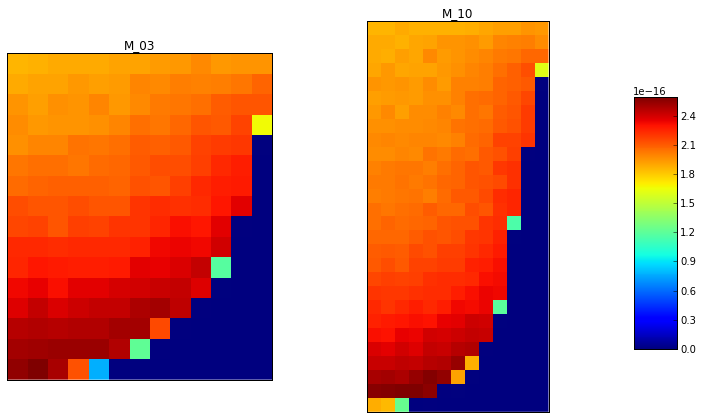

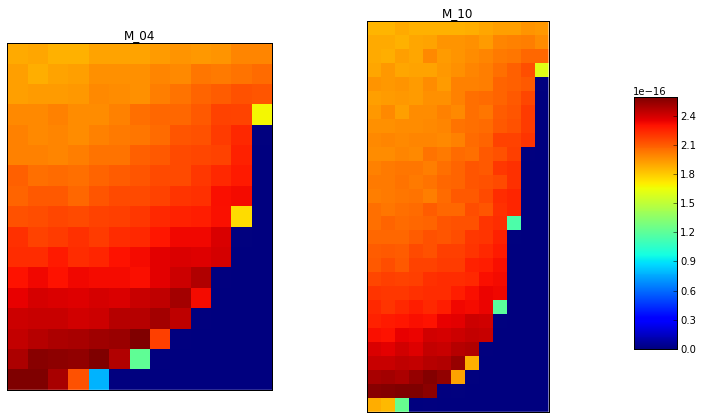

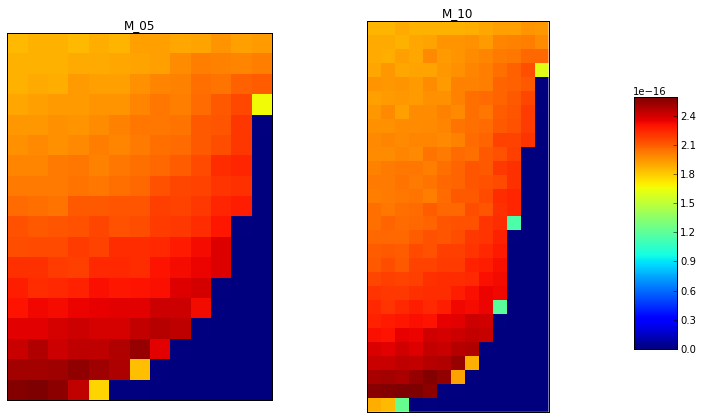

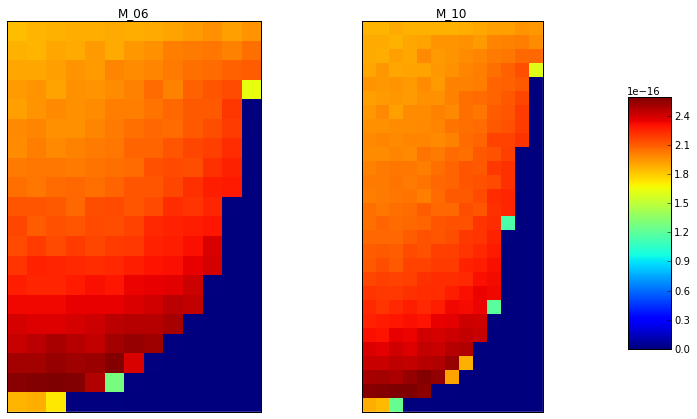

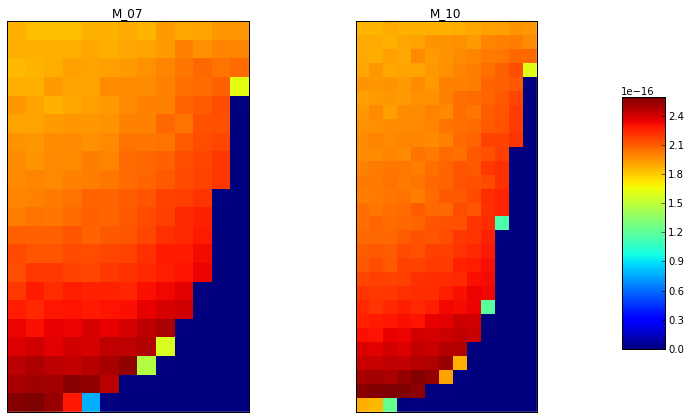

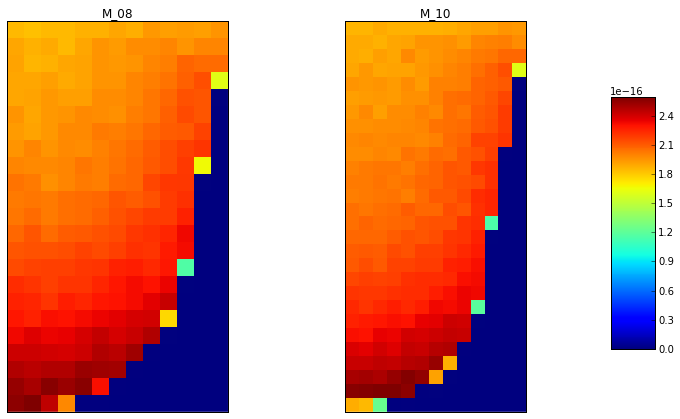

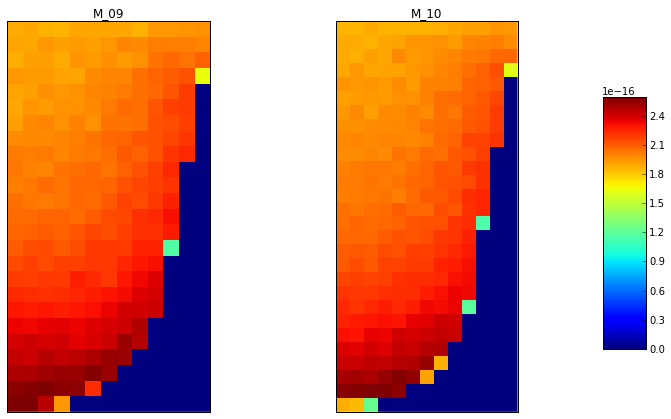

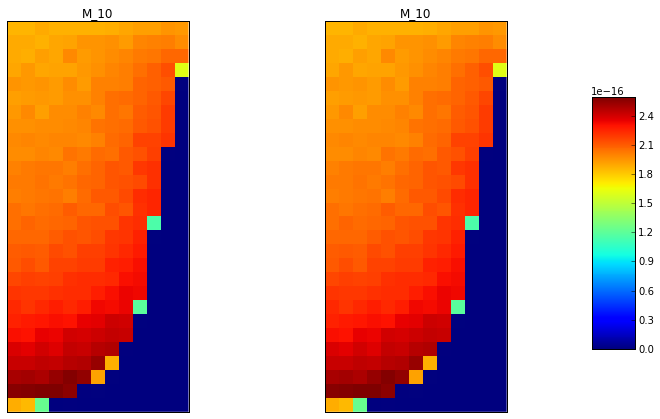

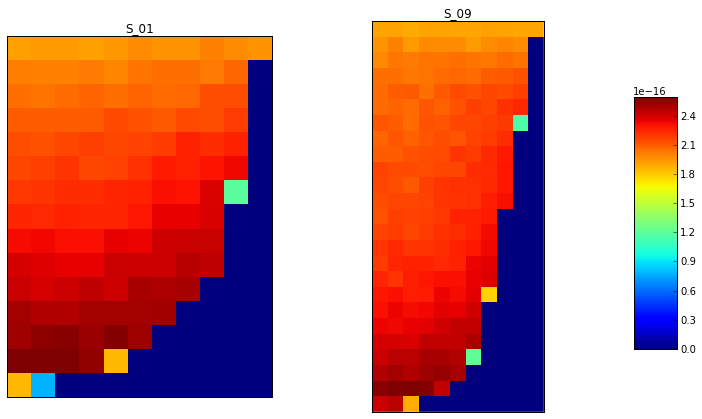

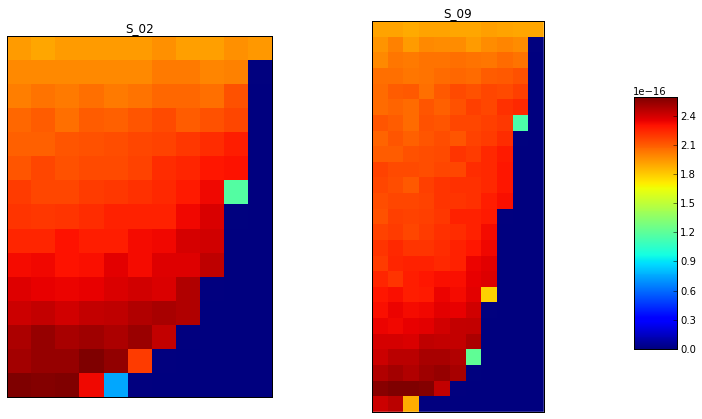

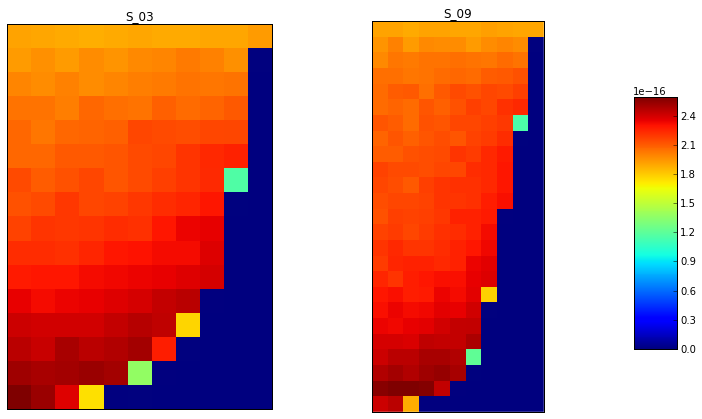

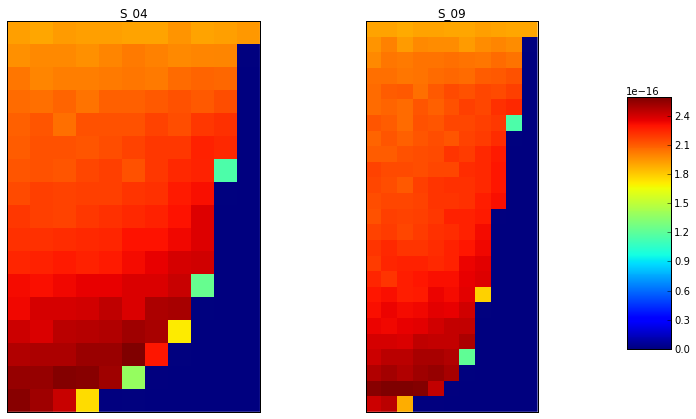

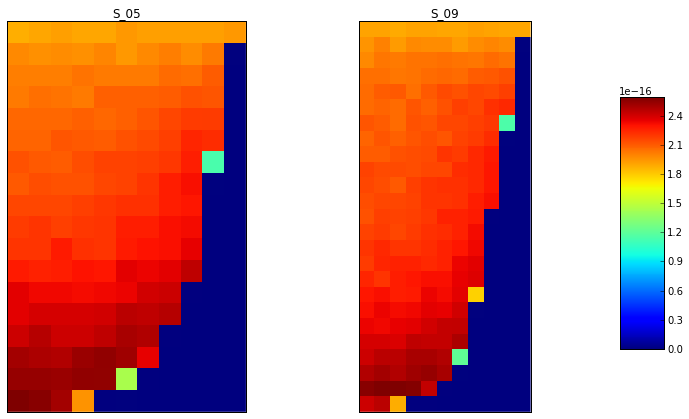

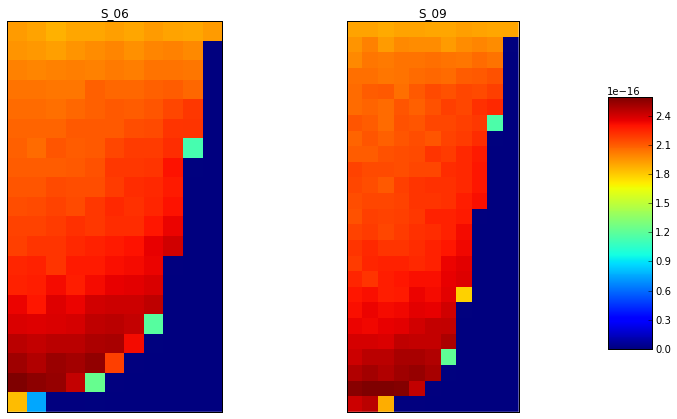

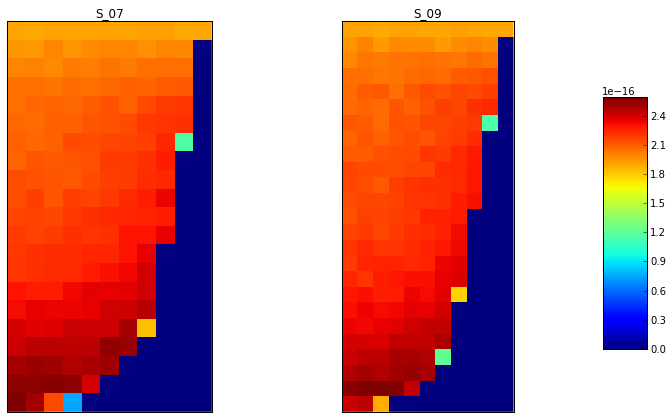

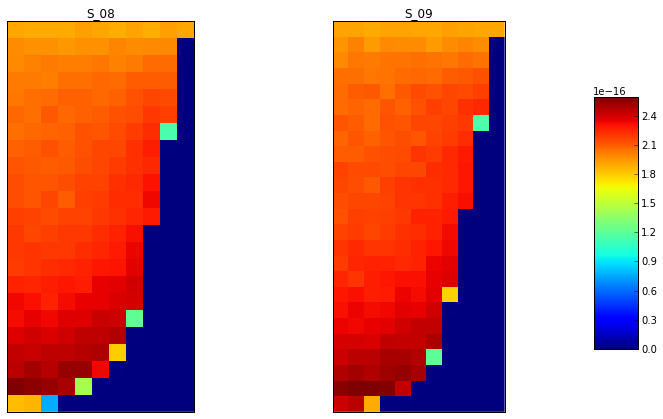

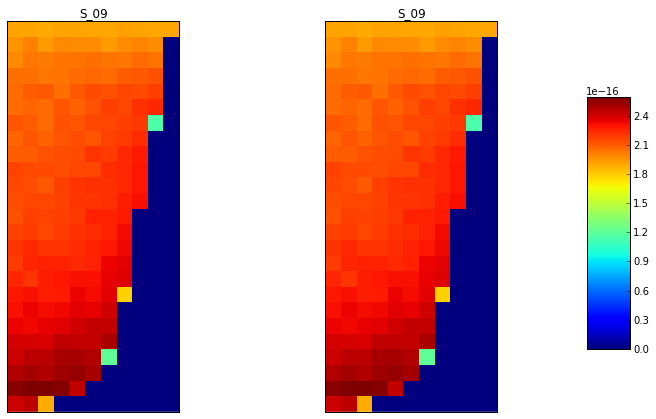

In [18]:
def max_image(dt, cup):
    cups = dt.loc[dt["Cup"] == cup]
    nums = cups["Num"]
    
    cmax = nums.max()
    
    dc = cups.loc[cups["Num"] == cmax]
    
    return (cmax, make_an_image(dc))

max_imgs = {}
max_imgs["L"] = max_image(dt, "L")
max_imgs["M"] = max_image(dt, "M")
max_imgs["S"] = max_image(dt, "S")

kk = 0
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn
        
    sh_dm = make_an_image(dc)
            
    img = None
    fig, axes = plt.subplots(1, 2, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})
    left = True
    ncup = num
    for ax in axes.flat:
        if left:
            img = ax.imshow(sh_dm, interpolation="none")
            left = False
        else:
            img = ax.imshow(max_imgs[cup][1], interpolation="none")
            ncup = max_imgs[cup][0]
            
        title = str(cup) + "_"
        if ncup < 10:
            title += "0"
        title += str(ncup)
        ax.set_title(title)

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.25, 0.05, 0.5])
    fig.colorbar(img, cax=cbar_ax)

    plt.show()
            
    kk += 1


## Check the gates consistency

In [29]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn

    q = dc["X20L"] < dc["X20R"]
    good = True
    if len(q) > q.sum():
        print("Inconsistent X-20%  gates for cup {0}, num {1}".format(cup, num))
        good = False
        
if good:
    print("Consistent X-20% gates for all cups".format(cup, num))

Consistent X-20% gates for all cups


In [27]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn

    q = dc["X50L"] < dc["X50R"]
    good = True
    if len(q) > q.sum():
        print("Inconsistent X-50%  gates for cup {0}, num {1}".format(cup, num))
        good = False
        
if good:
    print("Consistent X-50% gates for all cups".format(cup, num))

Consistent X-50% gates for all cups


In [28]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn

    q = dc["X80L"] < dc["X80R"]
    good = True
    if len(q) > q.sum():
        print("Inconsistent X-80%  gates for cup {0}, num {1}".format(cup, num))
        good = False
        
if good:
    print("Consistent X-80% gates for all cups".format(cup, num))

Consistent X-80% gates for all cups


In [30]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn

    q = dc["Y20L"] < dc["Y20R"]
    good = True
    if len(q) > q.sum():
        print("Inconsistent Y-20%  gates for cup {0}, num {1}".format(cup, num))
        good = False
        
if good:
    print("Consistent Y-20% gates for all cups".format(cup, num))

Consistent Y-20% gates for all cups


In [31]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn

    q = dc["Y50L"] < dc["Y50R"]
    good = True
    if len(q) > q.sum():
        print("Inconsistent Y-50%  gates for cup {0}, num {1}".format(cup, num))
        good = False
        
if good:
    print("Consistent Y-50% gates for all cups".format(cup, num))

Consistent Y-50% gates for all cups


In [32]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn

    q = dc["Y80L"] < dc["Y80R"]
    good = True
    if len(q) > q.sum():
        print("Inconsistent Y-80%  gates for cup {0}, num {1}".format(cup, num))
        good = False
        
if good:
    print("Consistent Y-80% gates for all cups".format(cup, num))

Consistent Y-80% gates for all cups


In [33]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn

    q = dc["Z20L"] < dc["Z20R"]
    good = True
    if len(q) > q.sum():
        print("Inconsistent Z-20%  gates for cup {0}, num {1}".format(cup, num))
        good = False
        
if good:
    print("Consistent Z-20% gates for all cups".format(cup, num))

Consistent Z-20% gates for all cups


In [34]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn

    q = dc["Z50L"] < dc["Z50R"]
    good = True
    if len(q) > q.sum():
        print("Inconsistent Z-50%  gates for cup {0}, num {1}".format(cup, num))
        good = False
        
if good:
    print("Consistent Z-50% gates for all cups".format(cup, num))

Consistent Z-50% gates for all cups


In [35]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn

    q = dc["Z80L"] < dc["Z80R"]
    good = True
    if len(q) > q.sum():
        print("Inconsistent Z-80%  gates for cup {0}, num {1}".format(cup, num))
        good = False
        
if good:
    print("Consistent Z-80% gates for all cups".format(cup, num))

Consistent Z-80% gates for all cups


## Check for monotonicity of the data

In [39]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn

    q = (dc["X20L"] < dc["X50L"]) & (dc["X20R"] > dc["X50R"])
    good = True
    if len(q) > q.sum():
        print("Inconsistent X-20-50% gates for cup {0}, num {1}".format(cup, num))
        good = False
        
if good:
    print("Consistent X-20-50% gates for all cups".format(cup, num))

Consistent X-20-50% gates for all cups


In [40]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn

    q = (dc["X50L"] < dc["X80L"]) & (dc["X50R"] > dc["X80R"])
    good = True
    if len(q) > q.sum():
        print("Inconsistent X-50-80% gates for cup {0}, num {1}".format(cup, num))
        good = False
        
if good:
    print("Consistent X-50-80% gates for all cups".format(cup, num))

Consistent X-50-80% gates for all cups


In [41]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn

    q = (dc["Y20L"] < dc["Y50L"]) & (dc["Y20R"] > dc["Y50R"])
    good = True
    if len(q) > q.sum():
        print("Inconsistent Y-20-50% gates for cup {0}, num {1}".format(cup, num))
        good = False
        
if good:
    print("Consistent Y-20-50% gates for all cups".format(cup, num))

Consistent Y-20-50% gates for all cups


In [42]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn

    q = (dc["Y50L"] < dc["Y80L"]) & (dc["Y50R"] > dc["Y80R"])
    good = True
    if len(q) > q.sum():
        print("Inconsistent Y-50-80% gates for cup {0}, num {1}".format(cup, num))
        good = False
        
if good:
    print("Consistent Y-50-80% gates for all cups".format(cup, num))

Consistent Y-50-80% gates for all cups


In [43]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn

    q = (dc["Z20L"] < dc["Z50L"]) & (dc["Z20R"] > dc["Z50R"])
    good = True
    if len(q) > q.sum():
        print("Inconsistent Z-20-50% gates for cup {0}, num {1}".format(cup, num))
        good = False
        
if good:
    print("Consistent Z-20-50% gates for all cups".format(cup, num))

Consistent Z-20-50% gates for all cups


In [44]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn

    q = (dc["Z50L"] < dc["Z80L"]) & (dc["Z50R"] > dc["Z80R"])
    good = True
    if len(q) > q.sum():
        print("Inconsistent Z-50-80% gates for cup {0}, num {1}".format(cup, num))
        good = False
        
if good:
    print("Consistent Z-50-80% gates for all cups".format(cup, num))

Consistent Z-50-80% gates for all cups


## Drawing centers of the shots from gates

In [50]:
dt["X20C"] = 0.5*(dt.X20L + dt.X20R)
dt["X50C"] = 0.5*(dt.X50L + dt.X50R)
dt["X80C"] = 0.5*(dt.X80L + dt.X80R)

dt["Y20C"] = 0.5*(dt.Y20L + dt.Y20R)
dt["Y50C"] = 0.5*(dt.Y50L + dt.Y50R)
dt["Y80C"] = 0.5*(dt.Y80L + dt.Y80R)

dt["Z20C"] = 0.5*(dt.Z20L + dt.Z20R)
dt["Z50C"] = 0.5*(dt.Z50L + dt.Z50R)
dt["Z80C"] = 0.5*(dt.Z80L + dt.Z80R)

dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12398 entries, 0 to 12397
Data columns (total 33 columns):
Cup     12398 non-null object
Num     12398 non-null int64
Col     12398 non-null int64
ShY     12398 non-null float64
ShZ     12398 non-null float64
Dm      12398 non-null float64
X20L    12398 non-null float64
X20R    12398 non-null float64
X50L    12398 non-null float64
X50R    12398 non-null float64
X80L    12398 non-null float64
X80R    12398 non-null float64
Y20L    12398 non-null float64
Y20R    12398 non-null float64
Y50L    12398 non-null float64
Y50R    12398 non-null float64
Y80L    12398 non-null float64
Y80R    12398 non-null float64
Z20L    12398 non-null float64
Z20R    12398 non-null float64
Z50L    12398 non-null float64
Z50R    12398 non-null float64
Z80L    12398 non-null float64
Z80R    12398 non-null float64
X20C    12398 non-null float64
X50C    12398 non-null float64
X80C    12398 non-null float64
Y20C    12398 non-null float64
Y50C    12398 non-null float

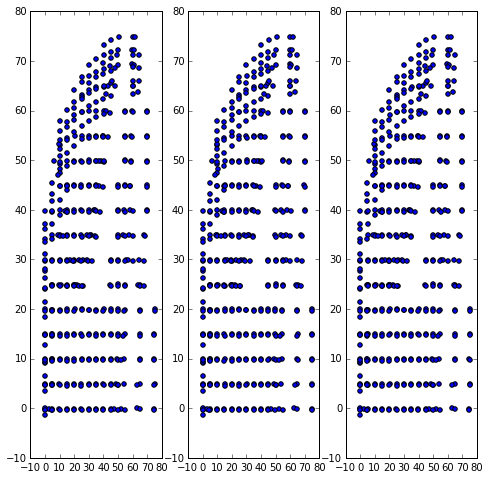

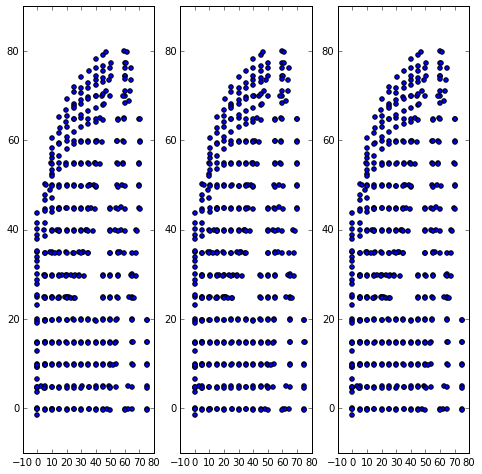

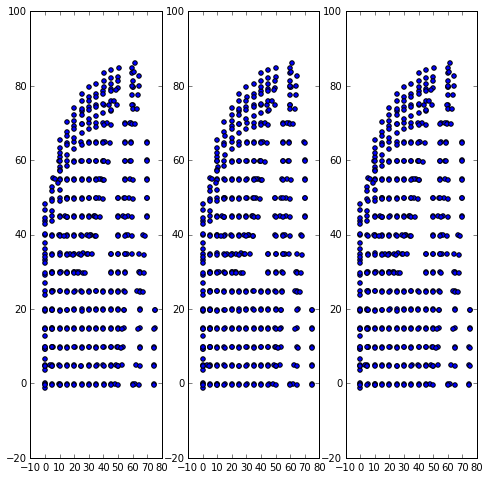

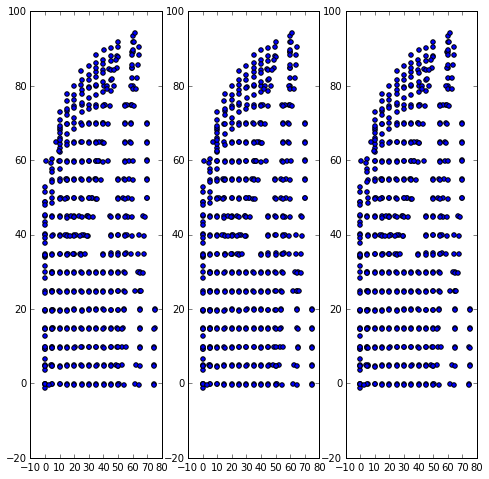

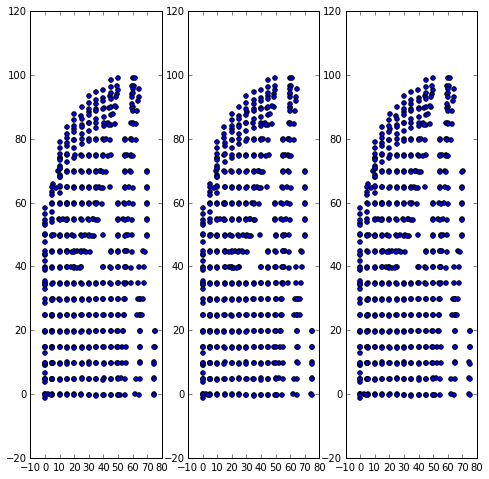

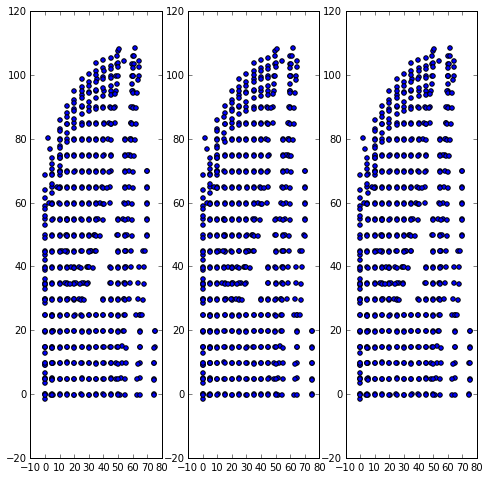

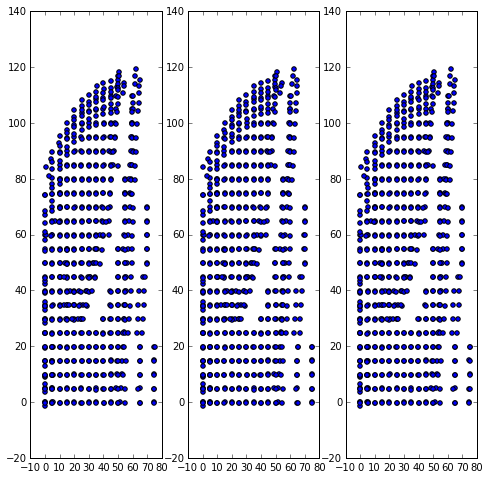

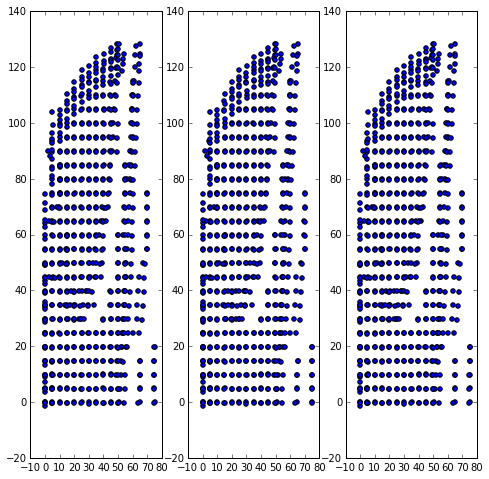

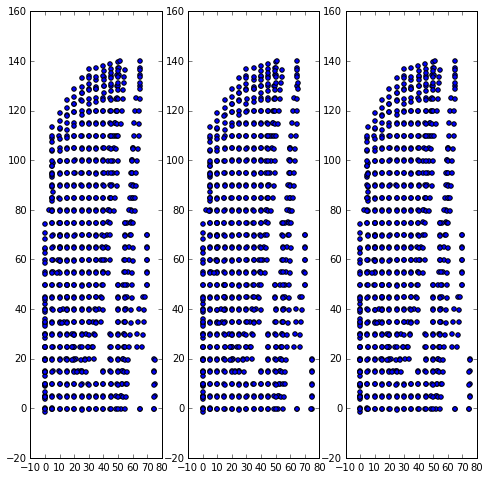

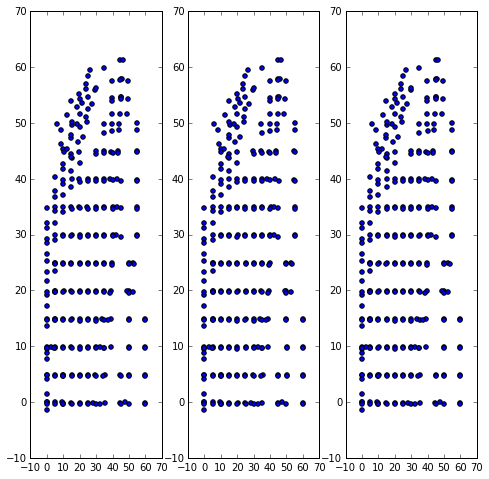

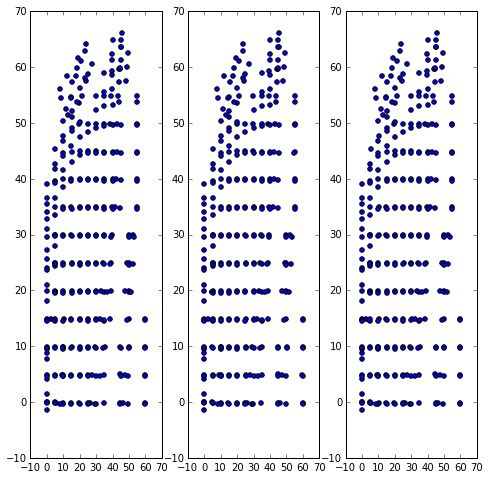

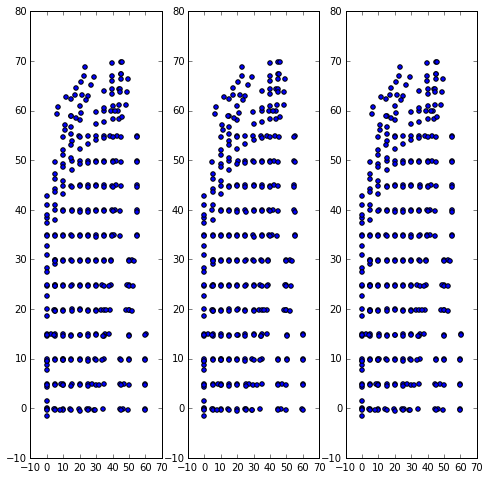

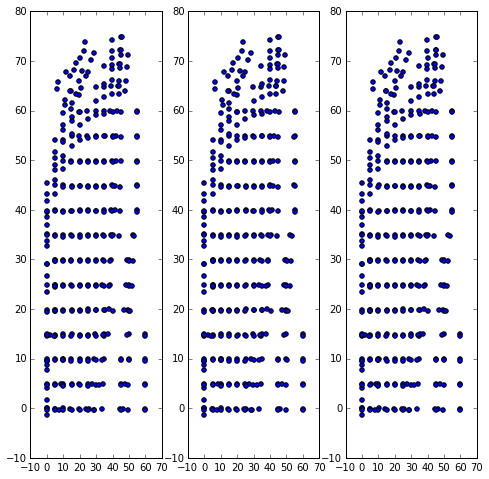

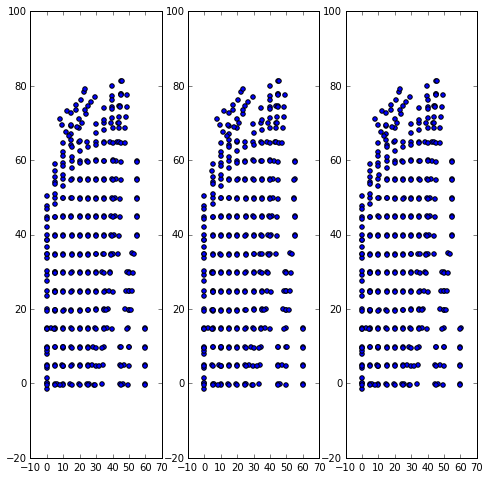

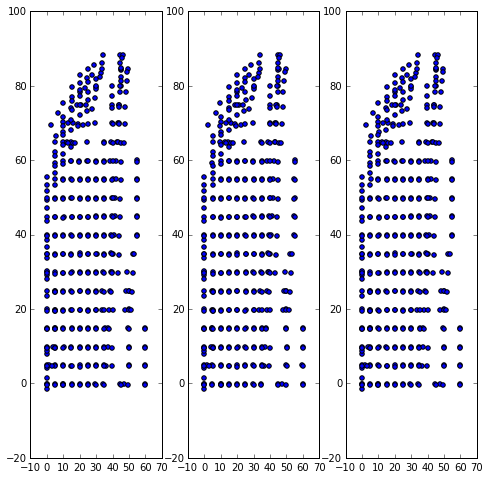

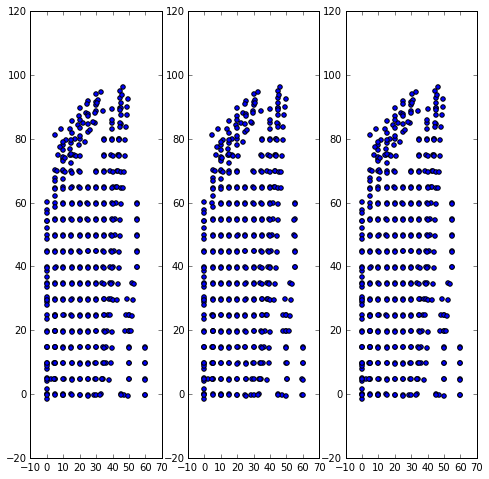

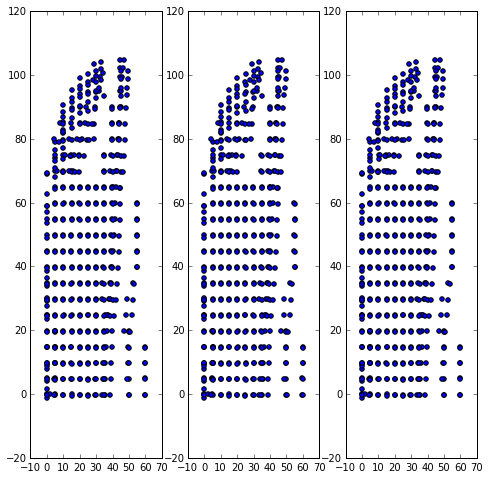

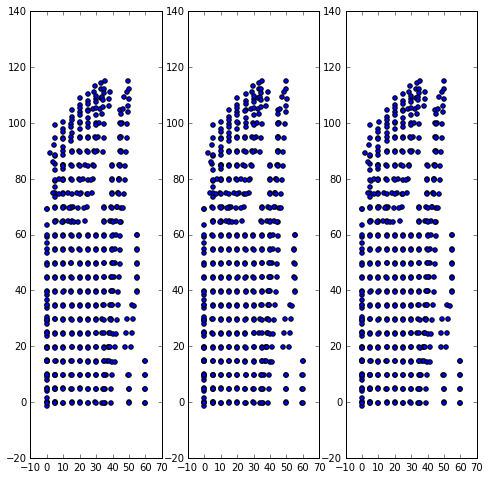

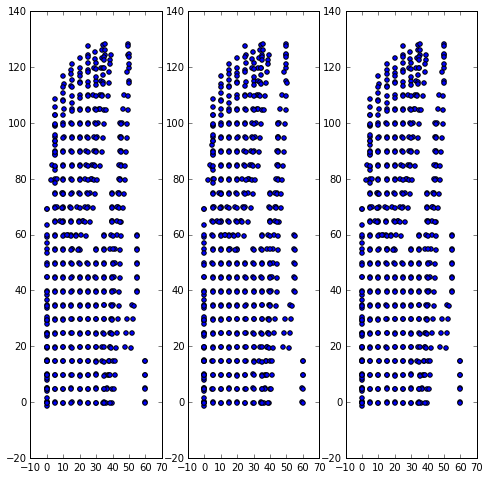

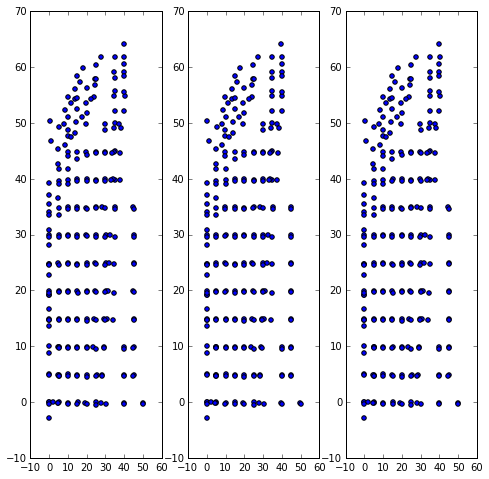

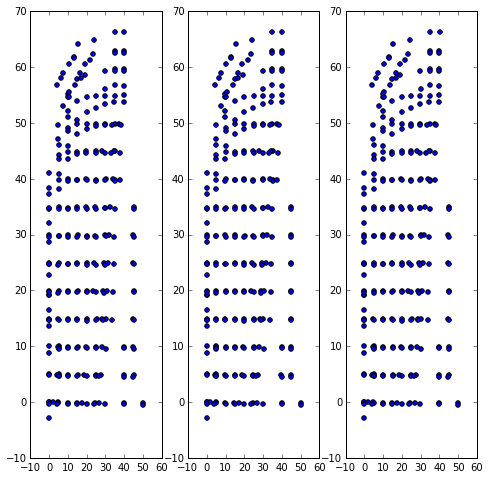

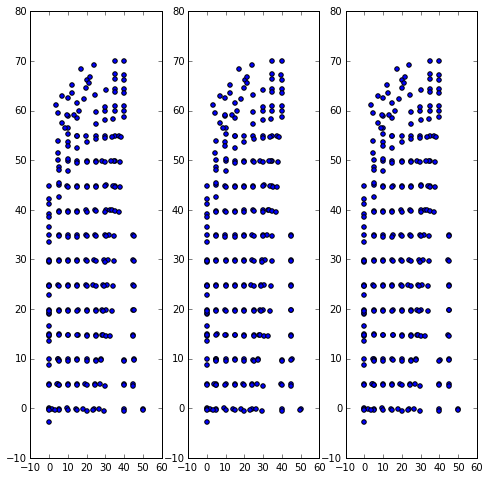

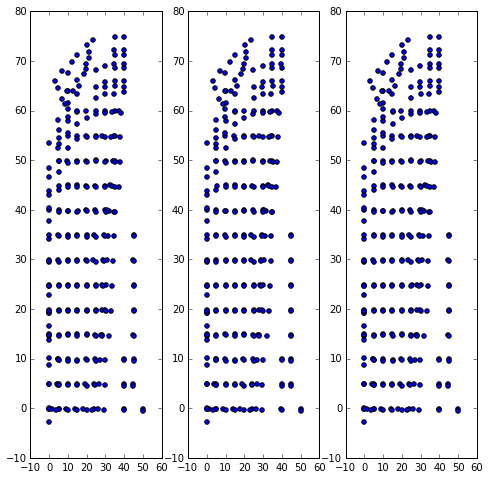

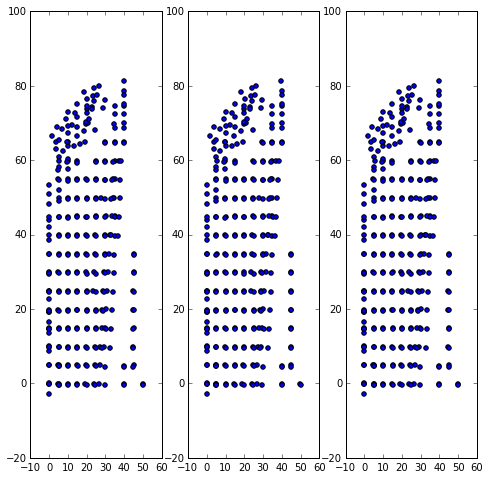

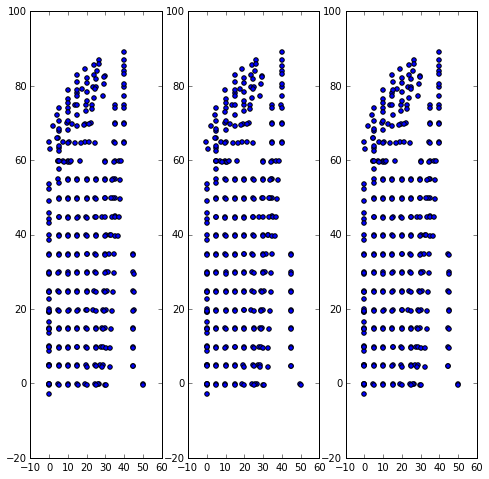

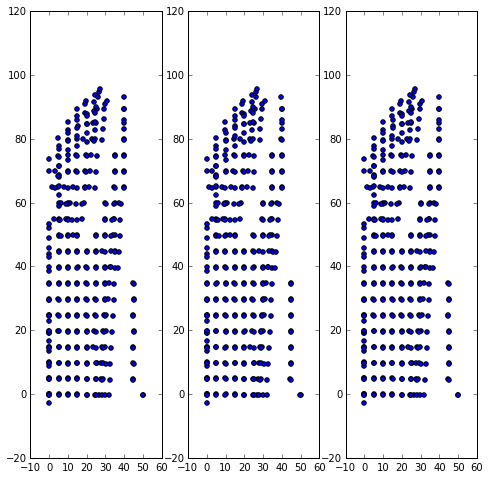

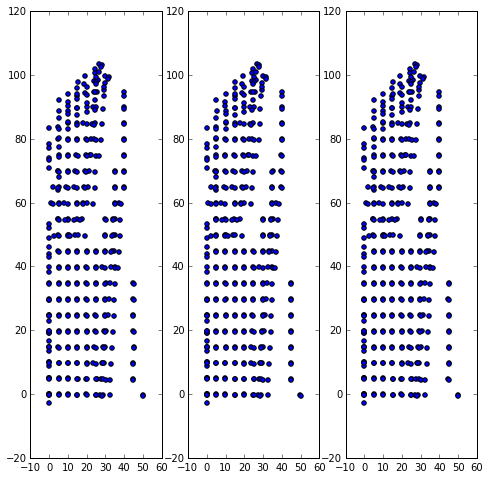

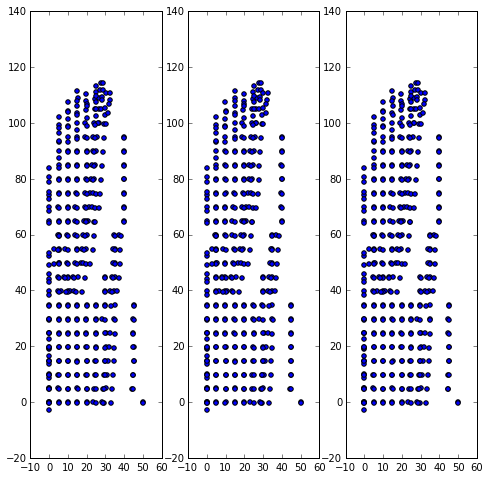

In [59]:
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn
        
    fig, axes = plt.subplots(1, 3, figsize=(8, 8))
    k = 0
    for ax in axes.flat:
        if k == 0:
            x = dc.Y20C
            y = dc.Z20C[::-1]
        if k == 1:
            x = dc.Y50C
            y = dc.Z50C[::-1]
        if k == 2:
            x = dc.Y80C
            y = dc.Z80C[::-1]
            
        ax.scatter(x, y)

    #fig.subplots_adjust(right=0.8)
    
    plt.show()
    #dc.plot(kind='scatter', x="Y20C", y="Z20C")
    
    
    